In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt
# pd.options.display.max_columns = None
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [3]:
transpop = pd.read_csv('data/transpop.csv')
transpop


,Unnamed: 0,STUDYID,WEIGHT,SURVEYCOMPLETED,GRESPONDENT_DATE,GCENREG,AGE,RACE,RACE_RECODE,RACE_RECODE_CAT5,...,ACE_SEP,ACE_INC,ACE_EMO_I,ACE_PHY_I,ACE_SEX_I,ACE_IPV_I,ACE_SUB_I,ACE_MEN_I,ACE_SEP_I,ACE_INC_I
0,0,151768927,0.986143,0,26-APR-2016,1,65,6,1,1,...,0,0,1,0,0,0,0,0,0,0
1,1,152357242,0.379683,0,07-APR-2016,3,38,6,1,1,...,0,0,0,0,0,0,0,1,0,0
2,2,152444055,0.705381,0,01-MAY-2016,3,25,6,1,1,...,0,0,0,0,0,0,0,1,0,0
3,3,152525272,1.595398,0,20-APR-2016,4,18,6,1,1,...,1,1,1,0,0,1,1,1,1,1
4,4,152894493,1.870422,0,05-MAY-2016,2,30,8,3,3,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,269,194845794,0.236381,1,03-JAN-2019,4,53,1,4,5,...,0,0,0,0,0,0,1,0,0,0
270,270,194850497,0.236381,1,19-NOV-2018,4,71,6,1,1,...,0,0,0,0,1,0,1,1,0,0
271,271,194873629,0.236381,1,13-NOV-2018,1,72,6,1,1,...,0,0,1,1,0,0,0,0,0,0
272,272,195236979,2.814055,1,18-NOV-2018,1,20,6,1,1,...,0,0,1,0,1,0,0,1,0,0


In [4]:
transpop.columns


Index(['Unnamed: 0', 'STUDYID', 'WEIGHT', 'SURVEYCOMPLETED',
       'GRESPONDENT_DATE', 'GCENREG', 'AGE', 'RACE', 'RACE_RECODE',
       'RACE_RECODE_CAT5',
       ...
       'ACE_SEP', 'ACE_INC', 'ACE_EMO_I', 'ACE_PHY_I', 'ACE_SEX_I',
       'ACE_IPV_I', 'ACE_SUB_I', 'ACE_MEN_I', 'ACE_SEP_I', 'ACE_INC_I'],
      dtype='object', length=567)

In [5]:
# transpop = transpop.rename(columns = {'Unnamed: 0': 'index'})#.set_index('index')
# transpop


# DATA CLEANING for population

In [7]:
transpop = transpop.assign(RACE_cat=transpop['RACE'].replace(
    {1: 'Asian', 2: 'Black/AA', 3: 'Hispanic/Latino', 4: 'Middle Eastern', 5: 'Native Hawaiian/Pacific Islander', 6: 'White', 7: 'American Indian', 8: 'Multirace', 9: 'Other'}))


In [8]:
transpop = transpop.assign(RACE_RECODE_cat=transpop['RACE_RECODE'].replace(
    {1: 'White', 2: 'Black', 3: 'Latino', 4: 'Asian', 5: 'Native Hawaiian/Pacific Islander', 6: 'Multirace', 7: 'Other'}))


In [9]:
transpop.groupby('RACE_RECODE_cat').count()


,Unnamed: 0,STUDYID,WEIGHT,SURVEYCOMPLETED,GRESPONDENT_DATE,GCENREG,AGE,RACE,RACE_RECODE,RACE_RECODE_CAT5,...,ACE_INC,ACE_EMO_I,ACE_PHY_I,ACE_SEX_I,ACE_IPV_I,ACE_SUB_I,ACE_MEN_I,ACE_SEP_I,ACE_INC_I,RACE_cat
RACE_RECODE_cat,,,,,,,,,,,,,,,,,,,,,
Asian,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Black,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Latino,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
Multirace,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
Native Hawaiian/Pacific Islander,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Other,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
White,187,187,187,187,187,187,187,187,187,187,...,187,187,187,187,187,187,187,187,187,187


<AxesSubplot:xlabel='RACE_RECODE_cat', ylabel='count'>

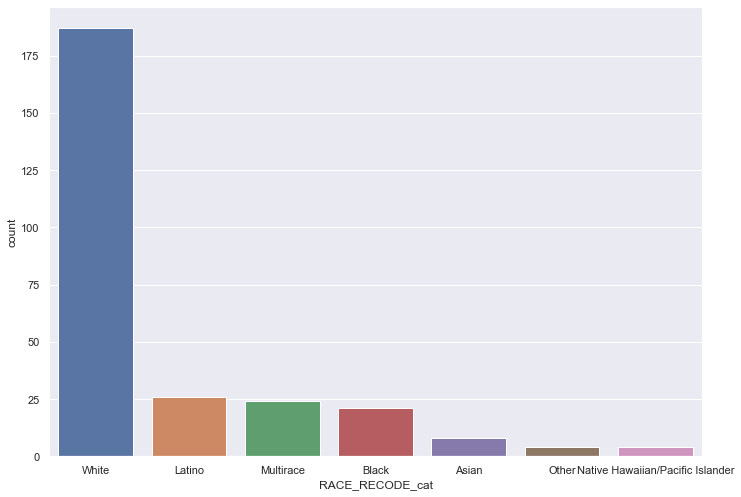

In [11]:
# countplot for RACE_RECODE_cat
sns.countplot(x='RACE_RECODE_cat', data=transpop)


<AxesSubplot:xlabel='AGE', ylabel='Count'>

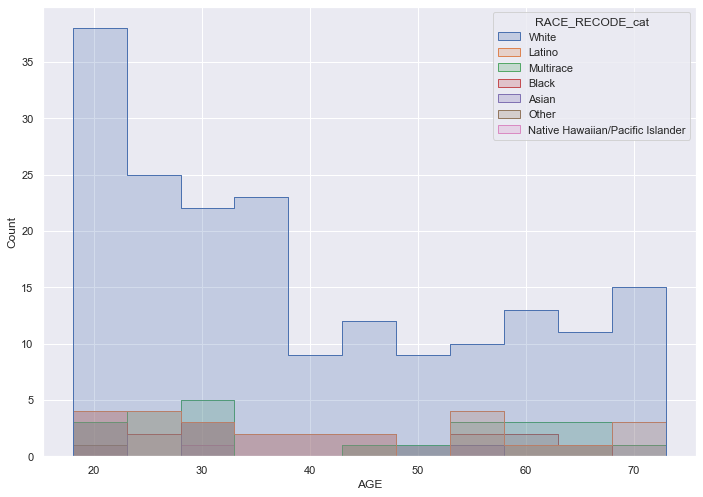

In [12]:
# age population depends on race
sns.histplot(data=transpop, x='AGE', hue='RACE_RECODE_cat', binwidth = 5, element="step")


In [13]:
# average age of participants depends on race
transpop.groupby('RACE_RECODE_cat').mean()['AGE']

RACE_RECODE_cat
Asian                               31.875000
Black                               38.238095
Latino                              40.384615
Multirace                           42.500000
Native Hawaiian/Pacific Islander    42.750000
Other                               48.500000
White                               38.994652
Name: AGE, dtype: float64

In [14]:
# average age of participants depends on race
transpop.groupby('RACE_RECODE_cat').median()['AGE']

RACE_RECODE_cat
Asian                               29.5
Black                               34.0
Latino                              37.5
Multirace                           39.0
Native Hawaiian/Pacific Islander    40.5
Other                               53.5
White                               34.0
Name: AGE, dtype: float64

In [27]:
pd.set_option('display.max_rows', None)


In [40]:
transpop['SEXUALID']

0      1
1      1
2      5
3      3
4      1
5      1
6      3
7      7
8      6
9      4
10     7
11     5
12     1
13     2
14     4
15     4
16     2
17     1
18     3
19     4
20     4
21     4
22     3
23     5
24     6
25     7
26     1
27     4
28     2
29     4
30     7
31     7
32     1
33     7
34     7
35      
36     1
37     5
38     2
39     3
40     5
41     4
42     2
43     1
44     1
45     3
46     2
47     4
48     4
49     5
50     5
51     2
52     9
53     2
54     1
55     5
56     5
57     5
58     5
59     2
60     1
61     9
62     9
63     7
64     4
65     5
66     2
67     4
68     5
69     1
70     5
71     8
72     1
73     1
74     5
75     4
76     4
77     4
78     2
79     3
80     9
81     1
82     9
83     1
84     2
85     1
86     6
87     5
88     5
89     7
90     3
91     5
92     5
93     2
94     3
95     4
96     5
97     6
98     9
99     5
100    9
101    5
102    5
103    8
104    5
105    8
106    4
107    1
108    5
109    1
110    4
1

In [45]:
transpop = transpop.assign(SEXUALID_cat=transpop['SEXUALID'].replace(
    {'1': 'Straight/heterosexual', '2': 'Lesbian', '3': 'Gay', '4': 'Bisexual', '5': 'Queer', '6': 'Same-gender loving', '7': 'Other', '8': 'Asexual spectrum', '9': 'Pansexual'}))

In [46]:
transpop['SEXUALID_cat']

0      Straight/heterosexual
1      Straight/heterosexual
2                      Queer
3                        Gay
4      Straight/heterosexual
5      Straight/heterosexual
6                        Gay
7                      Other
8         Same-gender loving
9                   Bisexual
10                     Other
11                     Queer
12     Straight/heterosexual
13                   Lesbian
14                  Bisexual
15                  Bisexual
16                   Lesbian
17     Straight/heterosexual
18                       Gay
19                  Bisexual
20                  Bisexual
21                  Bisexual
22                       Gay
23                     Queer
24        Same-gender loving
25                     Other
26     Straight/heterosexual
27                  Bisexual
28                   Lesbian
29                  Bisexual
30                     Other
31                     Other
32     Straight/heterosexual
33                     Other
34            

In [38]:
transpop = transpop.assign(SEX_cat=transpop['SEX'].replace(
    {1: 'Female', 2: 'Male'}))

In [39]:
transpop['SEX_cat']

0        Male
1      Female
2      Female
3      Female
4      Female
5      Female
6        Male
7      Female
8      Female
9        Male
10       Male
11     Female
12     Female
13     Female
14       Male
15       Male
16       Male
17       Male
18     Female
19       Male
20       Male
21       Male
22     Female
23     Female
24     Female
25       Male
26       Male
27       Male
28       Male
29       Male
30       Male
31       Male
32       Male
33       Male
34     Female
35       Male
36     Female
37     Female
38       Male
39       Male
40     Female
41       Male
42       Male
43       Male
44       Male
45       Male
46       Male
47       Male
48     Female
49       Male
50       Male
51       Male
52       Male
53     Female
54       Male
55       Male
56     Female
57     Female
58     Female
59       Male
60       Male
61       Male
62     Female
63       Male
64     Female
65     Female
66     Female
67     Female
68     Female
69       Male
70     Female
71    